# Example of persistent Rayleigh quotient on a random geometric graph

## Imports

These imports are necessary

In [1]:
import numpy as np
from persistent_rayleigh_quotient import PersistentRayleighQuotient

and these are just for this example.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

## Generate a random geometric graph

First we generate a random geometric graph with 250 points.

In [3]:
graph = nx.random_geometric_graph(250, 0.1, seed=25)

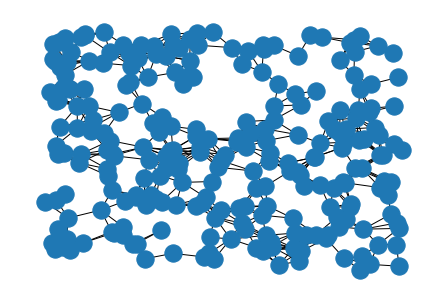

In [4]:
nx.draw(graph, pos=nx.get_node_attributes(graph, 'pos'))

Currently, the PRQ takes in a boundary matrix, so we need to construct one from the graph.

In [5]:
num_nodes = len(graph.nodes())
num_edges = len(graph.edges())
boundary = np.zeros((num_nodes, num_edges))
for i, edge in enumerate(graph.edges()):
    u, v = edge
    boundary[u][i] = -1
    boundary[v][i] = 1

Let us create a few signals on the graph.

In [6]:
xvals = np.array([graph.nodes[node]['pos'][0] for node in graph.nodes])
yvals = np.array([graph.nodes[node]['pos'][1] for node in graph.nodes])
radius = np.array([np.linalg.norm(graph.nodes[node]['pos']) for node in graph.nodes])
random = np.random.random(num_nodes)

Say we want the filtration on the graph as the x-coordinates of the points.
Currently, the algorithm for computing the PRQ is not well optimised, so we bin the values.

In [7]:
filtration = np.digitize(xvals, bins=np.linspace(0, 1, 10))

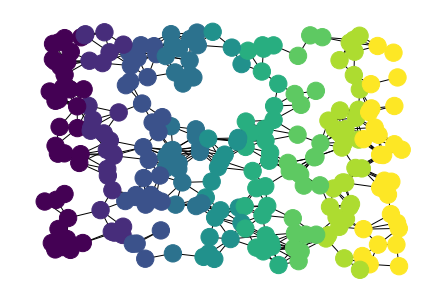

In [8]:
nx.draw(graph, pos=nx.get_node_attributes(graph, 'pos'), node_color=filtration)

For this example, we can set the weights of all the edges to 1.

In [9]:
edge_weights = np.ones(num_edges)

## Apply the persistent Rayleigh quotient

We initialise the `PersistentRayleighQuotient` object, setting `normalised=True`
to get the normalised PRQ.

In [10]:
prq = PersistentRayleighQuotient(normalised=True)

Then we fit this object onto our data from the last section.

In [11]:
prq.fit(boundary, edge_weights, filtration)

If we want to apply this PRQ to a graph signal, say `yvals`, all we have to do is call the object
on the graph signal:

In [12]:
prq(yvals)

[[0.0029342137778703885,
  0.003963459030849014,
  0.00472102905425127,
  0.005009357249210449,
  0.0051702883453578815,
  0.005408968734158501,
  0.005444927342214293,
  0.005503566634967487,
  0.005515324621567436],
 [0.002892863170433737,
  0.003337699092029122,
  0.0036565473270592282,
  0.0037658485589526242,
  0.004013808832575414,
  0.004053343641926356,
  0.004118516680775668,
  0.004131785926377751],
 [0.0029831542064226876,
  0.003322237974512637,
  0.003501309399337131,
  0.0037502980895473778,
  0.0037939995338316414,
  0.0038737901529884776,
  0.0038898487250508835],
 [0.002816435576912815,
  0.0030024318430336094,
  0.0032454986021031957,
  0.0032930598371984816,
  0.0033910357743101712,
  0.0034101539556918897],
 [0.0030861698751698916,
  0.003364969163671733,
  0.0034417505026712197,
  0.003638591861041354,
  0.003677966845818119],
 [0.003332019902342151,
  0.003483684015230836,
  0.0038094444817164358,
  0.0038827270399321547],
 [0.0034950289180001658, 0.00382859312152

Lets define a helper function to visualise the PRQ results.

In [13]:
def plot_prq(signal):
    plt.imshow(prq.to_image(prq(signal)), origin='lower')
    plt.xlabel('birth')
    plt.ylabel('death')

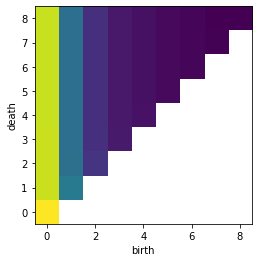

In [14]:
plot_prq(xvals)

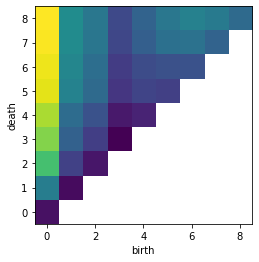

In [15]:
plot_prq(yvals)

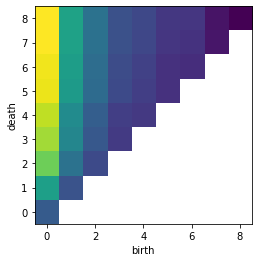

In [16]:
plot_prq(radius)

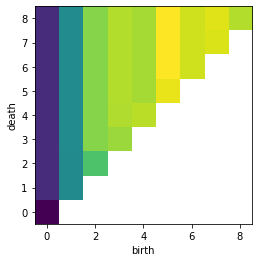

In [17]:
plot_prq(random)